# Compsci 753 Assignment 3
Joshua Monigatti<br> 
jmon587<br>
677195382<br>

In [1]:
### Imports
import numpy as np 
from numpy.linalg import norm
import pandas as pd 
import scipy.sparse as sp
from sklearn.preprocessing import normalize
from time import time

import matplotlib.pyplot as plt 

plt.rcParams["figure.figsize"] = (10,8)
# Quality of life
size = 20

In [2]:
n = 875713 # Setting the n 
mat = sp.dok_matrix((n, n), dtype=np.int8) # Creating the empty 

In [3]:
start = time() # Checking how long it takes to run
with open("web-Google.txt",'r') as obj:
    
    for line in obj:
        edge = line.rstrip().split(" ") # Remove the trailing \n and split on whitespace
        s,d = int(edge[0]),int(edge[-1])
        mat[d,s] = 1 # The b is the destination (Row) and a is the source (Col)

adj_matrix = mat.tocsr() # Convert it to an CSR 
print(f"Time taken to run cell: {time() - start :.2f}s")

Time taken to run cell: 76.98s


In [4]:
n_mat = normalize(adj_matrix, norm ='l1', axis = 0)

In [5]:
def power_iterate(): 
    # Construct the rank vector
    r = np.full([n,1], 1 / n)
    start = time()
    iterations = 0

    leak_outs = [] # This is used in task 2 

    # Running the Power Iteration Algorithm
    while True: 
        r1 = n_mat.dot(r)
        if norm(np.subtract(r1, r), 1) < 0.02: 
            break
        # If a column does not sum to 1 then it means that leaks occur
        # Take the sum of the matrix and subtract it from one to get the amount of leekage
        leak_outs.append(1 - sum(r1))
        r = r1

        iterations += 1 
    end = time() - start
    return iterations, end, r, leak_outs

In [6]:
# Part 1b)  
iterations, end, r, leak_outs = power_iterate()
flat_r = r.flatten(order = 'C')
ind = flat_r.argsort()[-10:][::-1]
values = flat_r[ind]

print(f"Time taken to run power iteration:{end: .2f}s")
print(f"Number of iterations: {iterations}\n")

print(f"ID's and scores of top 10 rank nodes:")
print('=' * 42)
for i in range(10): 
    print(f"ID: {ind[i]}, score: {values[i]}")

print('=' * 42)

Time taken to run power iteration: 32.52s
Number of iterations: 61

ID's and scores of top 10 rank nodes:
ID: 6116, score: 0.0006142653226569773
ID: 69055, score: 0.0006026988237679194
ID: 69056, score: 0.0006026988237679194
ID: 69057, score: 0.0006026988237679194
ID: 31562, score: 0.00038752068910951715
ID: 572672, score: 0.00034746634519001687
ID: 572673, score: 0.00030891720581562276
ID: 60232, score: 0.00027901554845488933
ID: 572674, score: 0.000269660191575348
ID: 305140, score: 0.00024249880826776926


In [24]:
# Task 2: Exploiting Dead ends 
print("Number of leak outs for each iteration:")
print('=' * 50)
for i, leak in enumerate(leak_outs): 
    print(f"Iteration: {i + 1}, Leaked PageRank Score: {leak}")
print('=' * 50)

Number of leak outs for each iteration:
Iteration: 1, Leaked PageRank Score: [0.15559778]
Iteration: 2, Leaked PageRank Score: [0.23910007]
Iteration: 3, Leaked PageRank Score: [0.28530267]
Iteration: 4, Leaked PageRank Score: [0.32035066]
Iteration: 5, Leaked PageRank Score: [0.35183554]
Iteration: 6, Leaked PageRank Score: [0.37954439]
Iteration: 7, Leaked PageRank Score: [0.40512937]
Iteration: 8, Leaked PageRank Score: [0.42827233]
Iteration: 9, Leaked PageRank Score: [0.44984208]
Iteration: 10, Leaked PageRank Score: [0.46964851]
Iteration: 11, Leaked PageRank Score: [0.4881852]
Iteration: 12, Leaked PageRank Score: [0.50535663]
Iteration: 13, Leaked PageRank Score: [0.52150215]
Iteration: 14, Leaked PageRank Score: [0.53654523]
Iteration: 15, Leaked PageRank Score: [0.55074022]
Iteration: 16, Leaked PageRank Score: [0.56403312]
Iteration: 17, Leaked PageRank Score: [0.5766075]
Iteration: 18, Leaked PageRank Score: [0.58843121]
Iteration: 19, Leaked PageRank Score: [0.59964464]
It

# Explain the phenomenon in the above code
After the second iteration there are vastly more leak outs than in the previous <br>
Following this it increases once again but by ~25% <br>
After this the changes in the leak out are relatively small from iteration 4 to 61 <br>

In [34]:
# Each time a new iteration is ran, the increase in the leakage is by a smaller amount as it heads towards 1
for i in range(1, len(leak_outs)): 
    print(abs(leak_outs[i] - leak_outs[i - 1]))

[0.08350229]
[0.0462026]
[0.03504799]
[0.03148488]
[0.02770885]
[0.02558498]
[0.02314296]
[0.02156976]
[0.01980642]
[0.01853669]
[0.01717144]
[0.01614551]
[0.01504308]
[0.01419499]
[0.0132929]
[0.01257438]
[0.01182371]
[0.01121344]
[0.0105767]
[0.01005298]
[0.00951128]
[0.00905583]
[0.0085897]
[0.00819406]
[0.00778828]
[0.00744117]
[0.00708804]
[0.00678068]
[0.00647035]
[0.00619902]
[0.00592394]
[0.0056822]
[0.0054391]
[0.0052221]
[0.00500524]
[0.00481138]
[0.00461658]
[0.0044418]
[0.00426767]
[0.00410912]
[0.00395204]
[0.0038091]
[0.00366656]
[0.0035365]
[0.00340795]
[0.00328898]
[0.00317199]
[0.00306394]
[0.00295694]
[0.00285789]
[0.00276073]
[0.00266952]
[0.00258046]
[0.00249713]
[0.00241515]
[0.00233829]
[0.00226342]
[0.00219226]
[0.00212324]
[0.00205789]


In [8]:
# Task 3a: Implemetation of Teleport

def pr_teleports(b, give_r): 
    r = np.full([n,1], (1 / n))  # Construct the rank vector
    #jump = (1 - b) * r # Constant vector that will be used for the values of teleports
    iterations = 0 # Keeps Track of all of the teleports
    #link = b * n_mat.dot(r) # Not sure if this is used outside of the runner code 
    start = time()

    # Running the Power Iteration Algorithm with teleports
    while True: 
        # Step 1) Calculate the rank with random walks
        r1 = b * (n_mat.dot(r))
        
        #  Step 2) / Step 3) Update the rank with the possibility of resulting there from a jump 
        #r1 += (1 - sum(r1)) / n
        jump = (1 - sum(r1)) / n
        # New r
        r1 = np.add(r1,jump)
        
        if norm(np.subtract(r1, r), 1) < 0.02: # Check that the difference is important enough
            break
        r = r1 # Update the value of r

        iterations += 1 
    end = time() - start
    if give_r:
        return iterations, end, r
    return iterations, end

In [9]:
# Task 3b) 
b = 0.9 # Beta value
iterations, end, r = pr_teleports(b, True)
flat_r = r.flatten(order = 'C')
ind = flat_r.argsort()[-10:][::-1]
values = flat_r[ind]

print(f"Time taken to run power iteration with teleports:{end: .2f}s")
print(f"Number of iterations: {iterations}\n")

print(f"ID's and scores of top 10 rank nodes:")
print('=' * 42)
for i in range(10): 
    print(f"ID: {ind[i]}, score: {values[i]}")

print('=' * 42)

Time taken to run power iteration with teleports: 6.32s
Number of iterations: 10

ID's and scores of top 10 rank nodes:
ID: 2138, score: 0.0010051733556308902
ID: 115, score: 0.0009690771628563133
ID: 3178, score: 0.0009379368329029661
ID: 2560, score: 0.000934486084769227
ID: 1950, score: 0.0008470853217684162
ID: 1181, score: 0.0008101314023884026
ID: 903, score: 0.0007892633596166054
ID: 1611, score: 0.0007614762866882549
ID: 3150, score: 0.0007539516024621503
ID: 3180, score: 0.000745012321962063


In [10]:
# Task 3c) 
varying_b = [1, 0.9, 0.8, 0.7, 0.6, 0.5]
n_its = []
times = []
for b in varying_b: 
    its, t = pr_teleports(b, False)
    n_its.append(its)
    times.append(t)
    
    # Run the algorithm from task 3a

Displaying the varying iterations for each varying beta
Total Run time: 71.18s

Value of beta: 1, number of iterations: 89
Value of beta: 0.9, number of iterations: 10
Value of beta: 0.8, number of iterations: 6
Value of beta: 0.7, number of iterations: 5
Value of beta: 0.6, number of iterations: 4
Value of beta: 0.5, number of iterations: 3


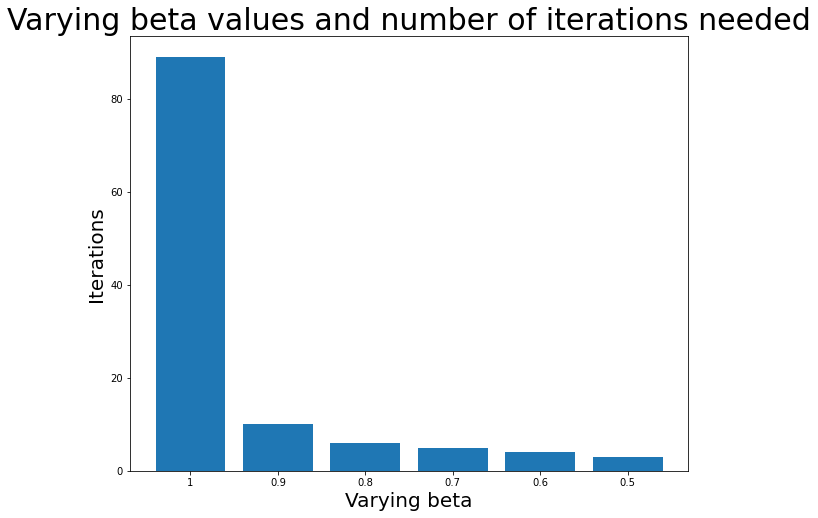

In [13]:
# Displaying the varying iterations for each varying beta 
print("Displaying the varying iterations for each varying beta")
print(f"Total Run time: {sum(times):.2f}s\n")
for i in range(len(n_its)): 
    print('=' * 44)
    print(f"Value of beta: {varying_b[i]}, number of iterations: {n_its[i]}")
print('=' * 44)

# Plotting it as a bar graph 

X_axis = np.arange(len(varying_b))
plt.bar(X_axis, n_its)
plt.title(f"Varying beta values and number of iterations needed", fontsize = size + 10)
plt.xlabel("Varying beta", fontsize = size)
plt.ylabel("Iterations", fontsize = size)
plt.xticks(X_axis, varying_b)
plt.show()